<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/FeatureEngineering/EncodingNumericalData/Discretization_or_Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/astrovishalthakur/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",
                 usecols=["Age", "Fare", "Survived"])

In [4]:
df.shape

(891, 3)

In [5]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.6223776223776224

In [14]:
np.mean(cross_val_score(clf, X, y, cv=10, scoring="accuracy"))

0.6373043818466353

In [15]:
kbin_age = KBinsDiscretizer(n_bins=15, encode="ordinal", strategy="quantile")
kbin_fare = KBinsDiscretizer(n_bins=15, encode="ordinal", strategy="quantile")

In [16]:
trf = ColumnTransformer(
    [
     ("first", kbin_age, [0]),
     ("second", kbin_fare, [1])
    ],
    remainder="passthrough"
)

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [19]:
trf.named_transformers_["first"].n_bins_ # tell no. of bins created

array([15])

In [20]:
trf.named_transformers_["second"].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
        13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
        51.4792,  76.2917, 108.9   , 512.3292])], dtype=object)

In [21]:
output = pd.DataFrame({
    "age": X_train["Age"],
    "age_trf": X_train_trf[:, 0],
    "fare": X_train["Fare"],
    "fare_trf": X_train_trf[:,1]
})

In [22]:
output["age_labels"] = pd.cut(x = X_train["Age"], bins=trf.named_transformers_["first"].bin_edges_[0].tolist())
output["fare_labels"] = pd.cut(x = X_train["Fare"], bins=trf.named_transformers_["second"].bin_edges_[0].tolist())

In [23]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
811,39.0,11.0,24.1500,8.0,"(38.0, 42.0]","(18.75, 26.0]"
394,24.0,5.0,16.7000,7.0,"(23.0, 25.0]","(14.454, 18.75]"
234,24.0,5.0,10.5000,5.0,"(23.0, 25.0]","(8.158, 10.5]"
779,43.0,12.0,211.3375,14.0,"(42.0, 47.0]","(108.9, 512.329]"
333,16.0,2.0,18.0000,7.0,"(6.0, 16.0]","(14.454, 18.75]"


In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [25]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [26]:
X_train_trf[:3]    #In output, these are value of bins in which age and fare were put

array([[8., 8.],
       [6., 7.],
       [8., 7.]])

In [27]:
X_train.head(3)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000


In [28]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy"))

0.6331181533646322

In [29]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare After")

    plt.show()

0.6317292644757433


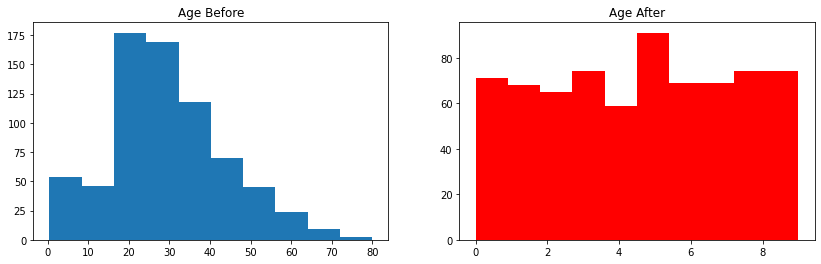

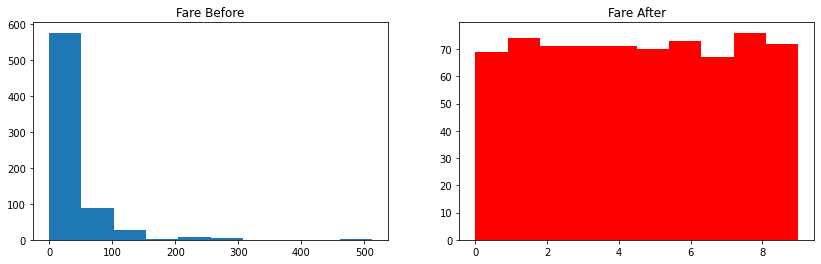

In [30]:
discretize(10, "quantile")

0.6359546165884193


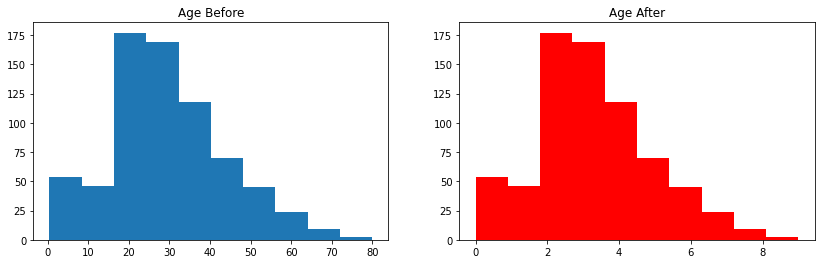

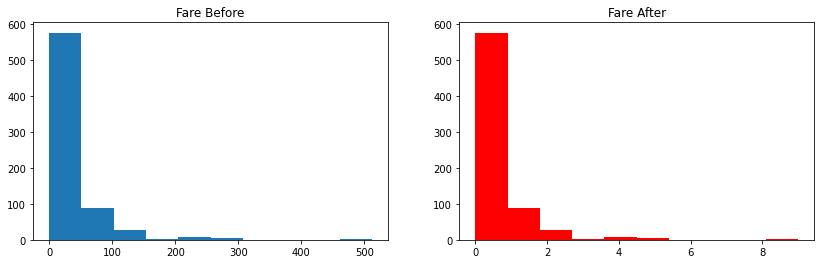

In [31]:
discretize(10, "uniform")

0.6316901408450704


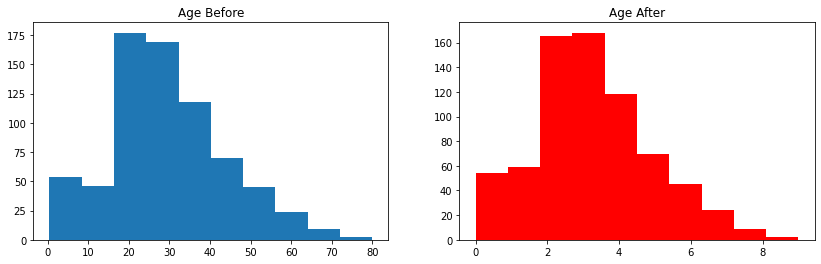

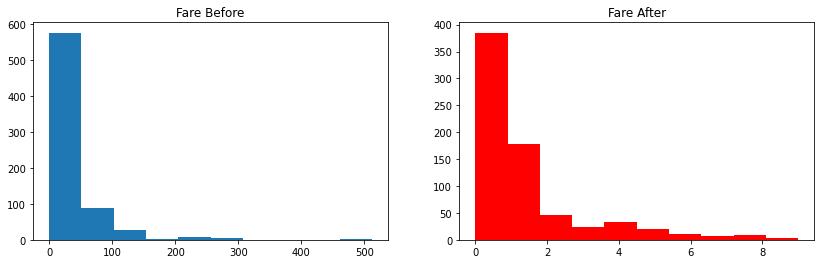

In [32]:
discretize(10, "kmeans")